# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [29]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [60]:
# TODO: Select three indices of your choice you wish to sample from the dataset
# indices = [21, 93, 420]
indices = [85, 183, 420]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,36847,43950,20170,36534,239,47943
2,4456,5266,13227,25,6818,1393


In [73]:
print "Difference of sample value to the datasets' mean:"
display(samples - data.mean())

print "Difference of sample value to the datasets' median:"
display(samples - data.median())

Difference of sample value to the datasets' mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4116.702273,40400.734091,84828.722727,-2045.931818,37945.506818,1419.129545
1,24846.702273,38153.734091,12218.722727,33462.068182,-2642.493182,46418.129545
2,-7544.297727,-530.265909,5275.722727,-3046.931818,3936.506818,-131.870455


Difference of sample value to the datasets' median:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7613.0,42570.0,88024.5,-500.0,40010.5,1978.5
1,28343.0,40323.0,15414.5,35008.0,-577.5,46977.5
2,-4048.0,1639.0,8471.5,-1501.0,6001.5,427.5


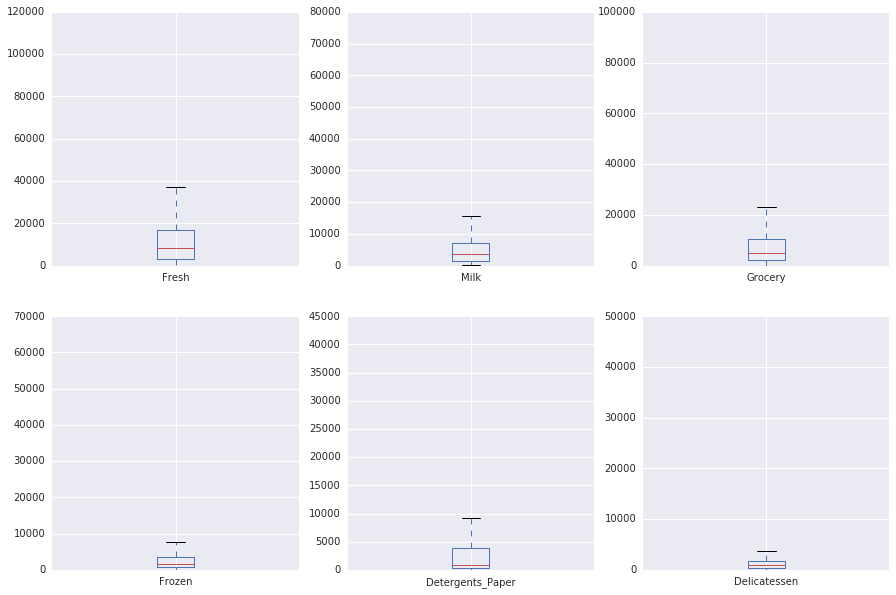

In [59]:
f, ax = plt.subplots(figsize = (15, 10))

data.plot(kind = 'box',
         ax = ax,
         subplots = True,
         layout = (2,3))

plt.show()

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Of the three samples I picked, the first sample has high spending on most products, excluding Frozen. It is observed by calculating the difference between the sample's spending to dataset's mean and median. Spending on Fresh, Milk, Grocery, and Detergents_Paper are much higher than the central tendency (both mean and median). Based on the boxplot, we can observe that this sample's Fresh spending is between median and the third quartile; Milk and Grocery, Detergents_Paper spending is far above the third quartile; Frozen spending is less than the median; and Delicatessen is between median and the third quartile. I suspect that this sample represents a hotel - since it spends a lot on raw ingredients for their restaurant (but they don't need much frozen food to serve), as well as its detergent for laundry cleaning.

Similar to the first sample, the second sample also has high spending on most products, but it has low spending on Detergents_Paper. Its Delicatessen, Milk, and Frozen spending is far above the third quartile and the whiskers (maximum value). It also has high Grocery and Fresh spending, but it is still between the third quartile and maximum value (1.5 * interquartile range). Its Detergents_Paper spending is slightly lower than the first quartile. Based on this observation, I think this sample represents a fast food restaurant.

The third sample has lower spending on Fresh, Frozen, Milk, and Delicatessen than the dataset's mean; but its Milk and Delicatessen spending is still higher than the median. It indicates skewed distribution of the dataset. Its Fresh spending is between the first quartile and median; Milk and Delicatessen spending is between median and the third quartile; Grocery and Detergents_Paper spending is above the third quartile - but is still below the whiskers; Frozen spending is below the first quartile. This sample represents an independent grocery store, with moderately high spending on detergents and grocery.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Delicatessen', 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Delicatessen'], test_size = 0.25, random_state = 101)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 101)
clf = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = clf.predict(X_test)
print score

print "R^2 value: {}".format(r2_score(y_test, score))

[ 2168.   249.   665.   340.   707.  1438.   239.   255.  2794.  1498.
  1438.   290.  2204.   303.  1328.   318.   739.  1542.  1153.   395.
   684.   975.   270.  1080.   707.  1788.   610.   707.   342.   297.
   373.  3137.   238.   201.   967.   526.   569.  2204.  1780.  5609.
  5130.   303.  1519.    18.  1265.  1838.  6465.   303.  2342.   739.
  2342.  1561.   964.  1451.  1838.   980.  2708.   379.   834.   572.
   975.  2784.  5609.  3637.  1780.   344.  4478.  2563.  2235.   347.
   373.   572.   635.   379.    84.  5130.   130.   716.   296.   211.
   156.   838.  1824.  1236.  2893.  1449.   314.  1384.   868.   665.
   255.  1886.   167.  1158.    18.  1534.   314.   244.   834.  1163.
    65.   860.  2802.   503.  1522.  2005.   834.  1295.   716.   249.]
R^2 value: 0.135562948847


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I tried to predict amount of spending on Delicatessen products, and results in only 0.135 of R^2 value, which shows little correlation between Delicatessen and other features. Hence, it might be a good feature to identify customers' spending habits, since it doesn't show multicollinearity with other features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

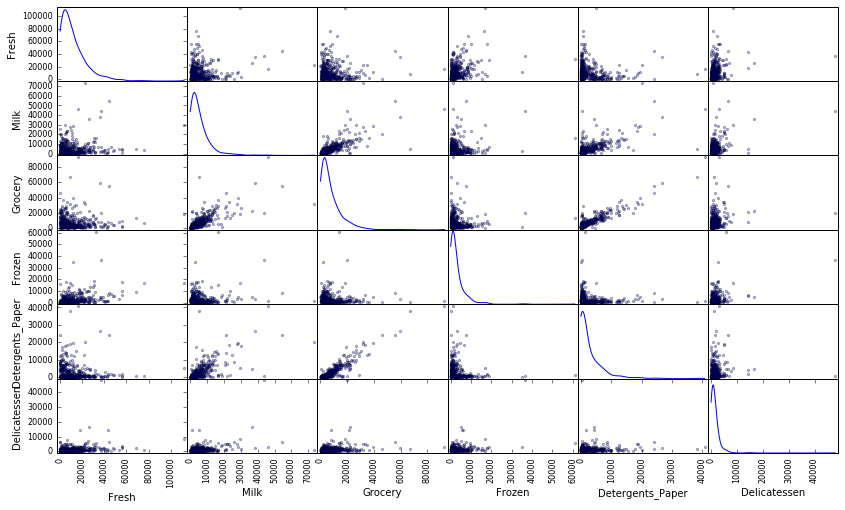

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

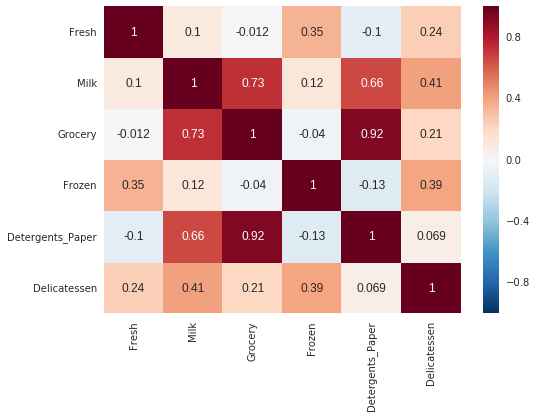

In [8]:
import seaborn as sns

sns.heatmap(data.corr(),
           annot = True)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

There are some feature pairs with correlation > 0.5:
- grocery and milk
- detergents_paper and milk
- grocery and detergents_paper

Above features shouldn't be used together on the predictive model, since it lowers the [BIC](http://www.stanfordphd.com/BIC.html). Delicatessen have moderate correlation with milk (~0.41) and frozen (~0.39) features, while it has lower correlation value with other features. It confirms my previous assumptions of its relevance as predicted feature.

The data distribution of each features are skewed to the right, with mean > median value. It indicates existence of outliers on the dataset, hence feature scaling is needed prior to further analysis.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

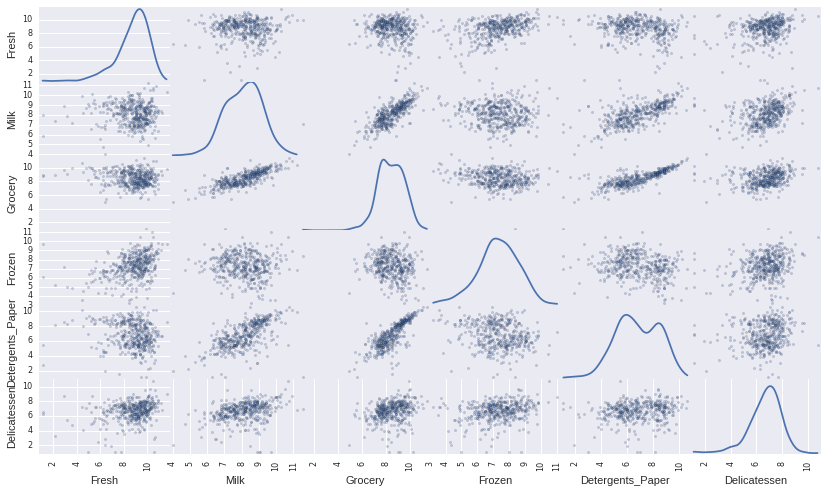

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
2,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# OPTIONAL: Select the indices for data points you wish to remove
# outliers = np.array([], dtype = 'int64')
outliers_set = pd.DataFrame(columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    outliers_point = pd.DataFrame(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
#     outliers = np.append(outliers, outliers_point.index)
    outliers_set = outliers_set.append(outliers_point)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

# select records which are identified as outliers multiple times
outliers_idx = pd.DataFrame(outliers_set.groupby(outliers_set.index).size(),
                           columns = ['Detected_Count'])
outliers_idx = outliers_idx[(outliers_idx.Detected_Count > 1)].index

# keep other records which are considered as outliers
_outliers = outliers_set.drop_duplicates()

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers_idx]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


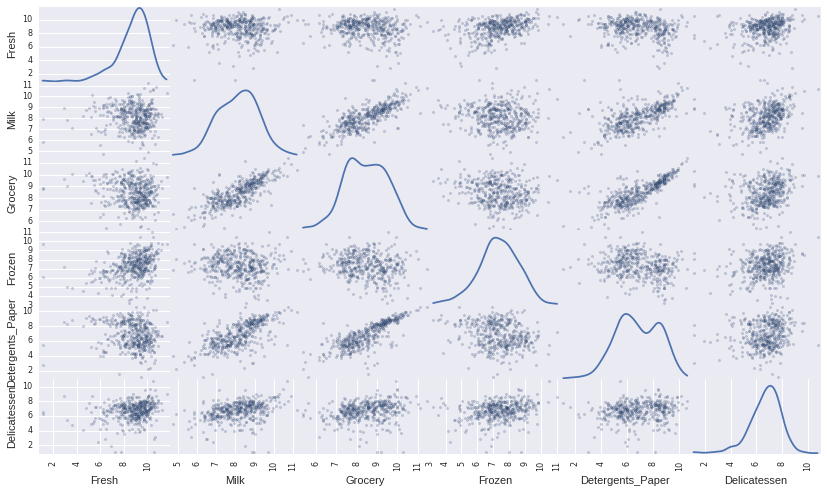

In [12]:
# before outliers removal
# pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are several data points which is detected as outliers on multiple features: record no 65, 66, 75, 128, 154.
Those data points are considered as true outliers since their features do not represent typical customer's behavior, and are removed from the dataset. After the removal, data distribution move slightly to the center, especially on Grocery.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

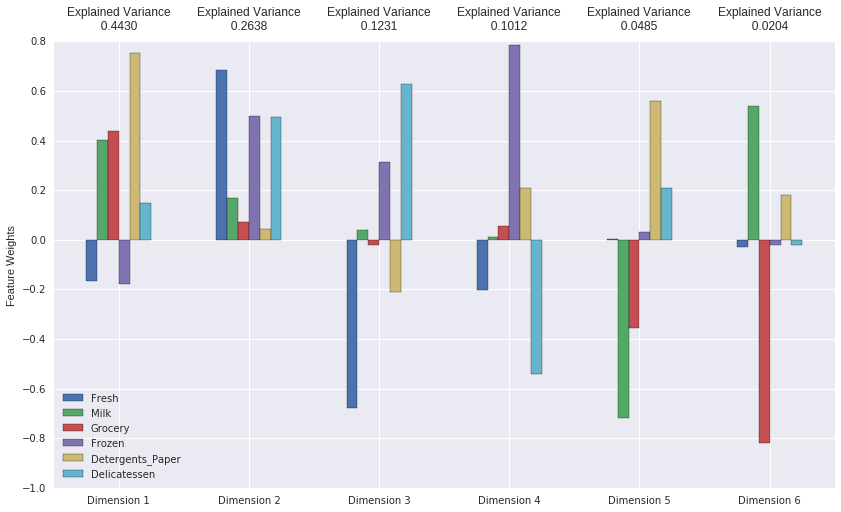

In [13]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [14]:
print "Cumulative Total of Explained Variance"
print pca_results['Explained Variance'].cumsum()

Cumulative Total of Explained Variance
Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The first principal component (PC) explains 44.3% of variance in the dataset, in which it highly considers value of  Detergents_Paper, Grocery, and Milk - which confirms previously-observed high correlation between these features. The second PC adds 26.38% of variance (70.68% in total), with higher weights on Fresh, Frozen, and Delicatessen features (all features excluding the highly-correlated ones with first PC). The third PC adds 12.31% of variance, while the fourth PC adds 10.12% of variance; with 93.11% of total variance by using 4 first PCs.
The third PC gives more weight on Fresh, Delicatessen, Frozen, and Detergents_Paper; whereas the fourth PC gives more weight on Frozen, Delicatessen, Fresh, and Detergents_Paper.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,5.3316,1.8845,-0.6957,-0.1972,-0.5461,-0.3802
1,0.4232,5.2842,2.7396,-0.2364,-2.1331,-0.2452
2,3.0266,-1.8034,-1.1358,-2.9577,0.4264,-0.1528


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
reduced_samples = pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2'])
display(reduced_samples)

,Dimension 1,Dimension 2
0,5.3316,1.8845
1,0.4232,5.2842
2,3.0266,-1.8034


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

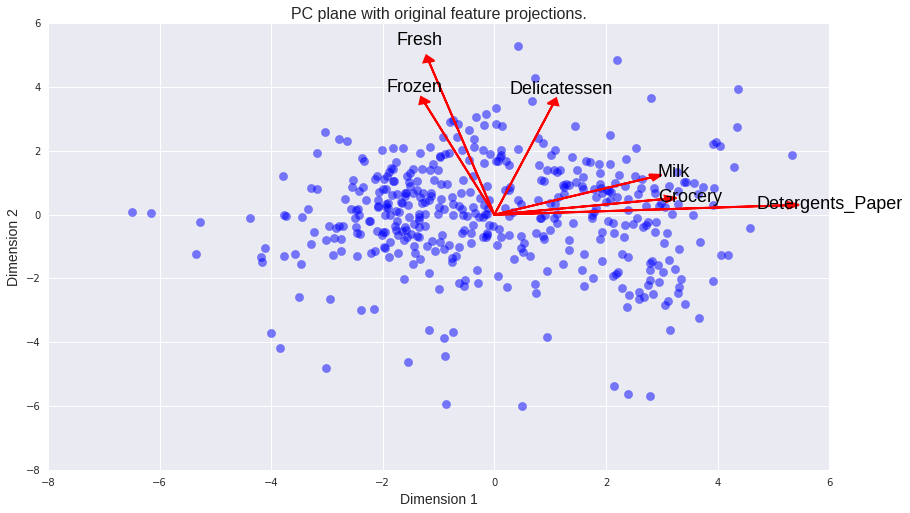

In [18]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

k-means clustering is the most fundamental algorithm on clustering problem, which has these advantages:

- is computationally faster than hierarchical clustering
- easy to implement

and disadvantages:

- value of k must be specified in the beginning, which is problematic if we do not have domain knowledge on the dataset
- it assumes that each cluster is equally sized and has similar variance 
- clustering result depends on centroid initialization - which is random

Compared to k-means clustering, Gaussian Mixture Model has these advantages:

- more flexible in terms of cluster covariance & it works well on data with different size and density; each cluster could have different shape, instead of spherical cluster on k-means.
- it accomodates multiple cluster membership, since it uses soft clustering on cluster assignment. On some cases, a data point could be a member of multiple clusters, e.g. a student could be a member of science and art club

References:
- https://www.inovex.de/blog/disadvantages-of-k-means-clustering/
- http://www.math.sjsu.edu/~gchen/Math285F15/MATH285_Project_Report_Weiqian.pdf
- https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm

On the wholesale customer dataset, I will initially go with k-means clustering, since it is the simplest one and it could give initial insight of the pattern in the dataset, which helps to confirm business users' assumption on underlying dataset. 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [19]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

best_k = 0
best_score = 0
## DRAFT
# distortions = []

for n in range(2,16):
    clusterer = KMeans(n_clusters = n, random_state = 101).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(reduced_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, clusterer.labels_, random_state = 101, metric = 'euclidean')
    if score > best_score:
        best_score = score
        best_k = n
    
    ## DRAFT: to check elbow plot, calculate distance between data point and the cluster center
#     distortions.append(sum(np.min(cdist(reduced_data, centers, 'euclidean'), axis=1)) / reduced_data.shape[0])
        
    print "k-means score with k = {0} equals to {1}".format(n, score)
    
print "Best k for k means: ", best_k

# # DRAFT: Create the elbow plot
# K = range(2,16)
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

# create clusterer using the best k value
clusterer = KMeans(n_clusters = best_k, random_state = 101).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(reduced_samples)

k-means score with k = 2 equals to 0.426281015469
k-means score with k = 3 equals to 0.396401929962
k-means score with k = 4 equals to 0.332930419681
k-means score with k = 5 equals to 0.350990778931
k-means score with k = 6 equals to 0.356746498582
k-means score with k = 7 equals to 0.36487535911
k-means score with k = 8 equals to 0.36825632494
k-means score with k = 9 equals to 0.345766718935
k-means score with k = 10 equals to 0.352603962784
k-means score with k = 11 equals to 0.357290706968
k-means score with k = 12 equals to 0.353788998923
k-means score with k = 13 equals to 0.352618777058
k-means score with k = 14 equals to 0.365622123644
k-means score with k = 15 equals to 0.357668446247
Best k for k means:  2


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

I put various number of k from 2 until 15, and the best silhouette score occurs with k equals to 2. From k equals to 4 and above, the silhouette score does not vary much.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

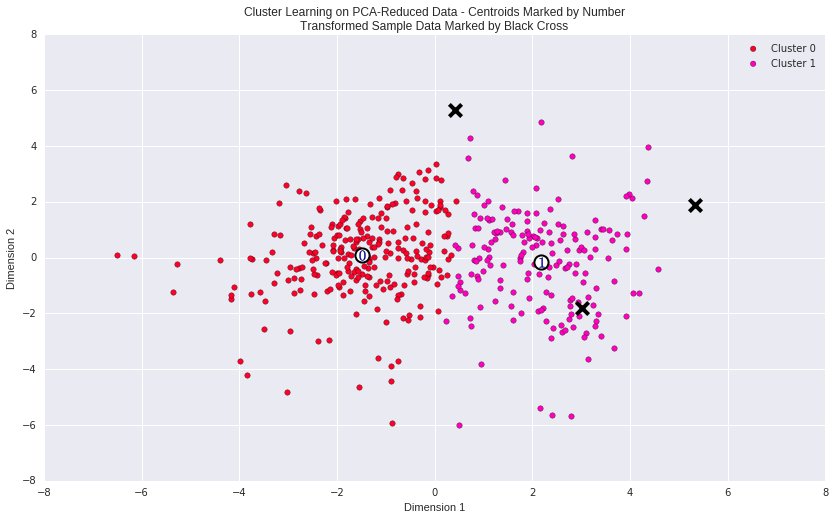

In [20]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


In [22]:
# Display a description of the original dataset
print "Summary statistics of original dataset"
display(data.describe())

print "Difference between segment centroid value and valid dataset's mean"
true_centers - np.mean(np.exp(good_data))

Summary statistics of original dataset


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Difference between segment centroid value and valid dataset's mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3222.372414,-3891.103448,-5434.158621,-1008.126437,-2554.473563,-855.797701
Segment 1,-8084.372414,2111.896552,4192.841379,-2144.126437,1712.526437,-500.797701


In [23]:
print "Difference between segment centroid value and valid dataset's median"
true_centers - np.median(np.exp(good_data))

Difference between segment centroid value and valid dataset's median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,6439.0,-531.0,49.0,-340.0,-2134.0,-1747.0
Segment 1,1577.0,5472.0,9676.0,-1476.0,2133.0,-1392.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Comparing the true center point values of each segment to the original summary statistics of the dataset, here is the result:

|Segment | Fresh | Milk | Grocery | Frozen | Detergents_Paper | Delicatessen |
|--------|-------|------|---------|--------|------------------|--------------|
|Segment 0 | between Q2 and Q3 | between Q1 and Q2 | between Q1 and Q2 | below Q1 | between Q1 and Q2| between Q1 and Q2|
|Segment 1 | between Q2 and Q3 | above Q3 | above Q3 | between Q1 and Q2 | above Q3 | between Q2 and Q3|

Using the difference to the median value of valid dataset, segment 0 represents small establishment type with high purchase on Fresh product and slightly higher purchase on Grocery, with low spending on Detergents_Paper, Delicatessen, Milk and Frozen. It might represent cafeteria, since it emphasizes on using Fresh products. Segment 1 has large spending on Grocery, Milk, Detergents_Paper, and Fresh product. This segment might represent independent grocery stores (resellers) and restaurants.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [115]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    
print "Difference between sample value and valid dataset's median:"
display(samples - np.median(np.exp(good_data)))

print "Difference between sample value and valid dataset's mean:"
display(samples - np.mean(np.exp(good_data)))

print "Sample Value:"
display(samples)

print "True Cluster Center Values:"
display(true_centers)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
Difference between sample value and valid dataset's median:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13689.0,43769.0,90352.0,-1402.0,38399.0,516.0
1,34419.0,41522.0,17742.0,34106.0,-2189.0,45515.0
2,2028.0,2838.0,10799.0,-2403.0,4390.0,-1035.0


Difference between sample value and valid dataset's mean:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4027.627586,40408.896552,84868.841379,-2070.126437,37978.526437,1407.202299
1,24757.627586,38161.896552,12258.841379,33437.873563,-2609.473563,46406.202299
2,-7633.372414,-522.103448,5315.841379,-3071.126437,3969.526437,-143.797701


Sample Value:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,36847,43950,20170,36534,239,47943
2,4456,5266,13227,25,6818,1393


True Cluster Center Values:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


**Answer:**

On the beginning of this analysis, I assumed that:

- Record with index 0 represents a hotel - since it has high amount of spending on Detergents_Paper, Grocery, Milk, and Fresh products. The clustering result is on Segment/Cluster 1, which also has high spending on Grocery, Milk, Detergents_Paper, and Fresh product. Its Fresh, Milk, Grocery, Detergents_Paper, and Delicatessen spending is lower than the cluster center's true values.

- Record with index 1 represents a fast food restaurant, since it spends a lot on Delicatessen, Milk, Fresh and Frozen products. The k-means clustering result is on Segment/Cluster 0, but the data point is located near the boundary to Segment/Cluster 1. Considering that this record's characteristics aren't fully complied to Segment/Cluster 0's - since it doesn't only spend a lot on Fresh and Grocery (its Fresh, Frozen, and Detergents_Paper spending is closer to Segment 0's cluster center value, while its Milk, Grocery, and Delicatessen spending is closer to Segment 1's ). If the clustering is repeated with other random_state value, this record might be clustered on Segment/Cluster 1. Hence, using Gaussian Mixture Model could improve the result.

- Record with index 2 represents an independent grocery store, with moderately high spending on Detergents and Grocery. It is clustered to Segment/Cluster 1, which has similar characteristics - its Fresh, Grocery, Detergents_Paper, and Delicatessen spending is higher than cluster center's true value; Milk spending is lower than the cluster center's true value; and Frozen spending is far below the cluster center's true value.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

Based on the segmentation results, changing delivery service to 3 days a week is likely to affect customers on Segment 0, since they have higher spending on Fresh product - it will not be convenient for them if they can't get the products delivered as previous, since fresh product cannot be bought in bulk. Customers on Segment 1 doesn't seem to be affected much if the wholesaler changes the delivery service to 3 days a week, considering that their spending on non-fresh products is also high. However, these hypotheses should be confirmed via execution of split test (e.g. A/B test). 

Based on the clustering result, we could separate the test into two tests: the first test is targeted for customers on Segment 0 and the second one is for customers on Segment 1. On each test, we will determine proportion of the control and experiment group, for example we apply  the experiment on 50% of the customers, whereas the other 50% will be the control group. After the experiment execution, the result will be calculated (by using t-test, ANOVA, etc.) and get the result: whether by changing the delivery service days will significantly change spending amount of customers on each cluster.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The ten newly acquired customers data points can be fitted in a clustering algorithm together with other customers' data point, and we will get the customer segmentation result. The customer segmentation result itself will be a new feature to the dataset, which later could be used as target label when we want to make a supervised model.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

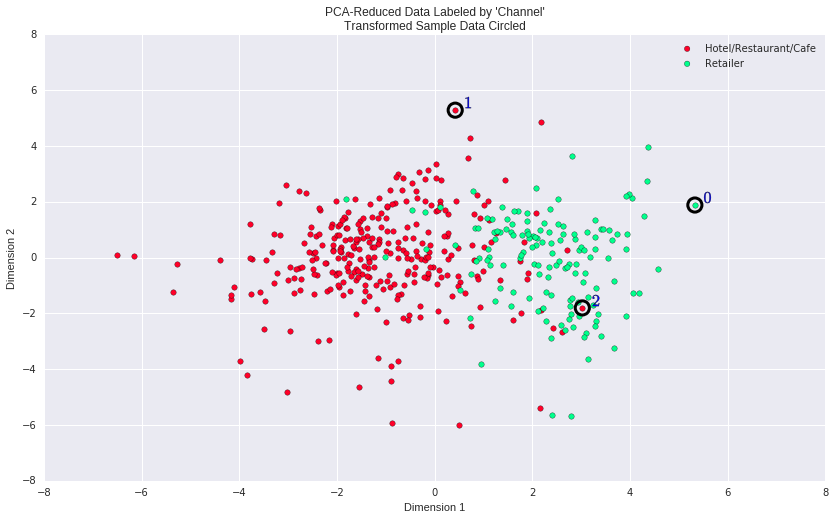

In [25]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers_idx, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Result of k-means clustering above doesn't seem to be good enough, since some data points are actually a member of other cluster although it is located closer to the assigned cluster's centroid (a few data points are assigned on Segment 1, while they are actually members of Segment 0, e.g. sample no 2). I don't think the segments are perfectly distributed, although more than 90% Hotel/Restaurant/Cafe is plotted on the left of PC1 = 0. The pure classification result could be found on -8 <= PC1 <= -2 or PC1 >= 4. Reviewing back to my initial guess on the customer segments, the Channel's classification results aren't consistent with my initial segmentation - actually it only occurs on sample record number 0, which I assume as hotel based on the annual spending. Perhaps my assumption of Hotel spending behavior is not correct. On the other hand, perhaps this data point is actually an outlier.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.